# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, SimpleRNN, LSTM, GRU
from tensorflow.keras import regularizers
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

# Reading our data

In [3]:
df = pd.read_csv('REVIEWS_1.csv')
df.head()

,ID,Review,Rating,AUTHOR,TITLE
0,1,I don't get all the terrible reviews for this ...,5.0,margarida-44311,Not Bad\n
1,2,I cannot believe anyone could give this film l...,8.0,joemay-2,What are all the bad reviews about is it a wo...
2,3,Great White is not the worst way to spend 90 m...,4.0,nebk,Great White=Jaws Lite\n
3,4,Great White is as basic of a killer shark film...,4.0,kuarinofu,Bare-bones killer shark film\n
4,5,"Terrible story, dialogue and CGI. The film has...",4.0,Horror_Flick_Fanatic,"Terrible story, dialogue, and CGI\n"


# Brief Information about our data

In [4]:
# No. of rows & Columns and datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5450 entries, 0 to 5449
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      5450 non-null   int64  
 1   Review  5450 non-null   object 
 2   Rating  5332 non-null   float64
 3   AUTHOR  5450 non-null   object 
 4   TITLE   5450 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 213.0+ KB


In [5]:
# Null Values

df.isnull().sum()

ID          0
Review      0
Rating    118
AUTHOR      0
TITLE       0
dtype: int64

# Wordcloud

In [6]:
from wordcloud import WordCloud
wc = WordCloud(width=800,
               height=500,
               background_color='white',
               min_font_size=10)

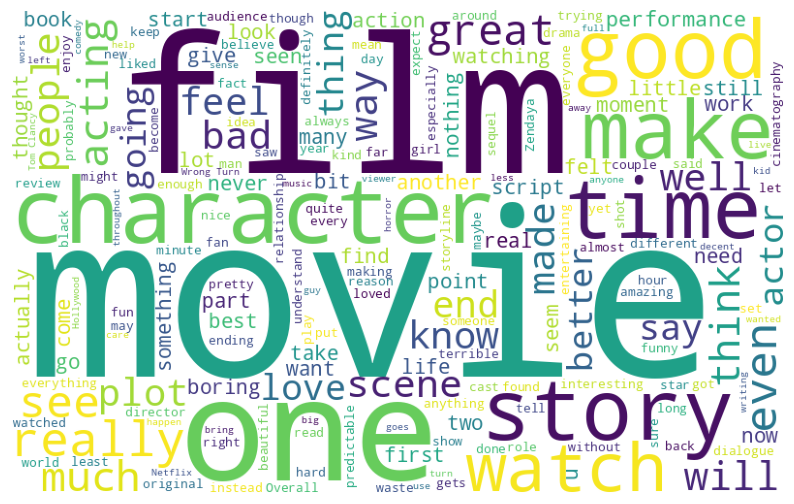

In [7]:
wc.generate(''.join(df['Review']))
plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.axis('off')
plt.show()

# Data Visualization

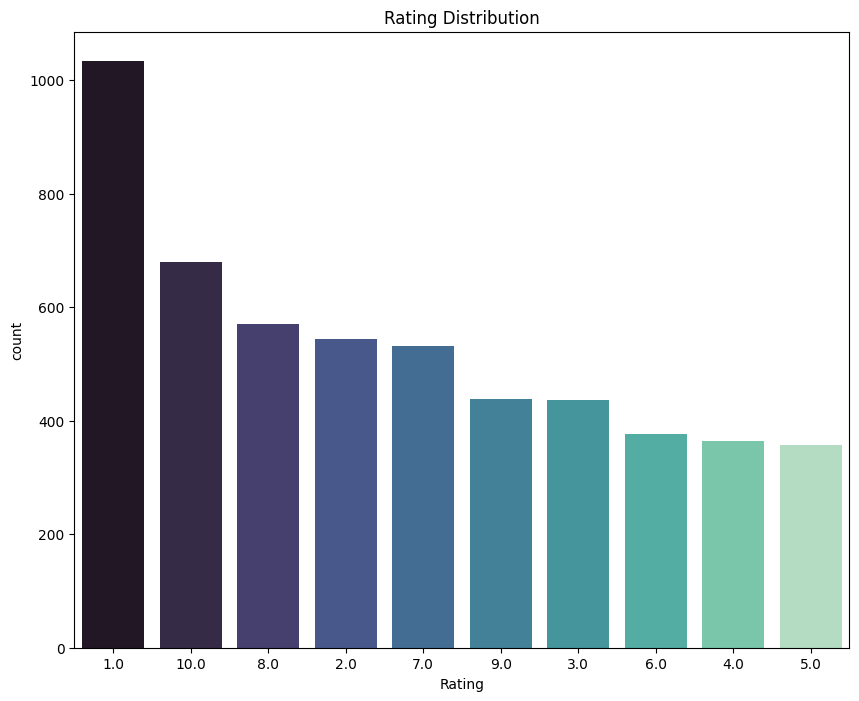

In [8]:
plt.figure(figsize=(10,8))

sns.countplot(data=df,
              x='Rating',
              palette="mako",
              order = df['Rating'].value_counts().index)

plt.title('Rating Distribution')

plt.show()

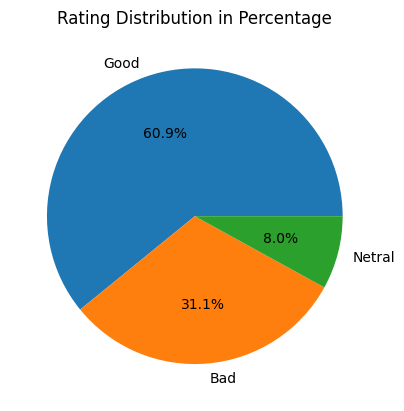

In [53]:
#plt.pie(df['Rating'].value_counts(), labels=df['Rating'].unique().tolist(), autopct='%1.1f%%')
#plt.title('Rating Distribution in percentage')
#plt.show()

rating_counts = df['Rating'].value_counts()
plt.pie(rating_counts, labels=rating_counts.index.tolist(), autopct='%1.1f%%')
plt.title('Rating Distribution in Percentage')
plt.show()

# Text Preprocessing

In [52]:
# Let's change the rating to be more general and easier to understand
def rating(score):
    if score > 3:
        return 'Good'
    elif score == 3:
        return 'Neutral'
    else:
        return 'Bad'

In [12]:
df['Rating'] = df['Rating'].apply(rating)

In [13]:
df.head()

,ID,Review,Rating,AUTHOR,TITLE
0,1,I don't get all the terrible reviews for this ...,Good,margarida-44311,Not Bad\n
1,2,I cannot believe anyone could give this film l...,Good,joemay-2,What are all the bad reviews about is it a wo...
2,3,Great White is not the worst way to spend 90 m...,Good,nebk,Great White=Jaws Lite\n
3,4,Great White is as basic of a killer shark film...,Good,kuarinofu,Bare-bones killer shark film\n
4,5,"Terrible story, dialogue and CGI. The film has...",Good,Horror_Flick_Fanatic,"Terrible story, dialogue, and CGI\n"


In [14]:
# Creating a Function clean_text for text preprocessing

def clean_text(text):
    stop = stopwords.words('english')
    punc = list(punctuation)
    bad_tokens = stop + punc
    lemma = WordNetLemmatizer()
    tokens = word_tokenize(text)
    word_tokens = [t for t in tokens if t.isalpha()]
    clean_token = [lemma.lemmatize(t.lower()) for t in word_tokens if t not in bad_tokens]
    return " ".join(clean_token)

In [15]:
# Applying text preprocessing methods to df['Review']

df['Review'] = df['Review'].apply(clean_text)

In [16]:
df.head()

,ID,Review,Rating,AUTHOR,TITLE
0,1,i get terrible review movie especially lot peo...,Good,margarida-44311,Not Bad\n
1,2,i believe anyone could give film le i gave i t...,Good,joemay-2,What are all the bad reviews about is it a wo...
2,3,great white worst way spend minute issue in fi...,Good,nebk,Great White=Jaws Lite\n
3,4,great white basic killer shark film possible e...,Good,kuarinofu,Bare-bones killer shark film\n
4,5,terrible story dialogue cgi the film predictab...,Good,Horror_Flick_Fanatic,"Terrible story, dialogue, and CGI\n"


# Splitting target and feature columns

In [17]:
x = df['Review']
y = df['Rating']

In [18]:
# Train Test Split

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=1,test_size=0.2)

# Checking No. of words in each sentence of Review column

In [19]:
sent_len = []
for sent in df['Review']:
    sent_len.append(len(word_tokenize(sent)))
df['sent_len'] = sent_len
df.head()

,ID,Review,Rating,AUTHOR,TITLE,sent_len
0,1,i get terrible review movie especially lot peo...,Good,margarida-44311,Not Bad\n,41
1,2,i believe anyone could give film le i gave i t...,Good,joemay-2,What are all the bad reviews about is it a wo...,19
2,3,great white worst way spend minute issue in fi...,Good,nebk,Great White=Jaws Lite\n,147
3,4,great white basic killer shark film possible e...,Good,kuarinofu,Bare-bones killer shark film\n,93
4,5,terrible story dialogue cgi the film predictab...,Good,Horror_Flick_Fanatic,"Terrible story, dialogue, and CGI\n",46


In [20]:
# Checking the reveiw with max no. of words

max(sent_len)

875

In [21]:
pd.set_option('display.max_rows', None)
print(df['sent_len'].value_counts())

sent_len
11     133
15     119
10     116
20     113
9      110
19     106
21     105
12     105
18     105
7      102
25      99
13      99
8       95
17      94
22      94
24      93
23      91
16      91
14      84
29      84
26      83
28      82
30      78
6       74
34      72
31      70
37      69
41      68
35      67
33      66
42      66
38      63
27      60
32      59
46      56
45      53
40      53
53      50
39      48
49      47
43      45
36      43
44      43
62      42
48      40
50      40
56      39
47      37
58      37
52      35
51      35
55      32
59      31
54      31
61      29
64      29
77      28
76      28
60      28
63      28
85      26
57      26
74      25
90      25
69      25
68      25
67      23
73      22
84      21
81      21
82      21
65      21
71      20
88      20
66      20
75      19
97      19
72      19
89      19
5       19
83      18
70      18
80      18
94      18
115     17
93      17
98      16
78      16
117     15
99      15
7

In [22]:
# Removing 5% of data beacuse not all sentence length is 39 which is our max sent_len.

np.quantile(sent_len,0.95)

187.0

In [23]:
max_len = 246

# Tokenization, Vectorization & Padding Sequence

In [24]:
# Word tokenize on basis of spacing between each words

tok = Tokenizer(char_level=False,split=' ')
tok.fit_on_texts(xtrain)

In [25]:
# Index of all unique tokenized words

tok.index_word

{1: 'i',
 2: 'movie',
 3: 'film',
 4: 'the',
 5: 'like',
 6: 'one',
 7: 'it',
 8: 'character',
 9: 'good',
 10: 'story',
 11: 'time',
 12: 'really',
 13: 'this',
 14: 'make',
 15: 'would',
 16: 'great',
 17: 'get',
 18: 'watch',
 19: 'even',
 20: 'could',
 21: 'much',
 22: 'well',
 23: 'acting',
 24: 'scene',
 25: 'see',
 26: 'bad',
 27: 'people',
 28: 'also',
 29: 'thing',
 30: 'first',
 31: 'plot',
 32: 'a',
 33: 'way',
 34: 'think',
 35: 'actor',
 36: 'made',
 37: 'better',
 38: 'performance',
 39: 'end',
 40: 'go',
 41: 'feel',
 42: 'love',
 43: 'action',
 44: 'know',
 45: 'say',
 46: 'watching',
 47: 'life',
 48: 'many',
 49: 'two',
 50: 'but',
 51: 'nothing',
 52: 'take',
 53: 'little',
 54: 'going',
 55: 'best',
 56: 'if',
 57: 'day',
 58: 'lot',
 59: 'never',
 60: 'and',
 61: 'give',
 62: 'something',
 63: 'part',
 64: 'year',
 65: 'there',
 66: 'still',
 67: 'seen',
 68: 'thought',
 69: 'work',
 70: 'pretty',
 71: 'look',
 72: 'show',
 73: 'script',
 74: 'real',
 75: 'point',


In [26]:
# Total No. of Unique words inour dataset

vocab_len = len(tok.index_word)
vocab_len

16509

In [27]:
# Putting all index/unique id of each words in a sequence according to the data

sequences_train = tok.texts_to_sequences(xtrain)
sequences_train

[[223,
  258,
  128,
  20,
  1,
  45,
  1777,
  2446,
  165,
  117,
  66,
  7083,
  16,
  3,
  4,
  751,
  10,
  498,
  574,
  48,
  48,
  11,
  224,
  13,
  11,
  41,
  53,
  164,
  22,
  97,
  258,
  536,
  145,
  1989,
  5041,
  1258,
  159,
  88,
  62,
  3129,
  95,
  8,
  47,
  4,
  371,
  1989,
  888,
  5844,
  166,
  117,
  37,
  65,
  4,
  671,
  9470,
  2339,
  7084,
  159,
  299,
  530,
  50,
  9471,
  2,
  9472,
  141,
  7,
  904,
  4024,
  818,
  804,
  718,
  274,
  17,
  888,
  240,
  65,
  420,
  420,
  604,
  65,
  708,
  1989,
  1170,
  47,
  65,
  16,
  9473,
  1171,
  166,
  2,
  45,
  80,
  6,
  147,
  300,
  148,
  4455,
  476,
  1259],
 [1096,
  499,
  5,
  796,
  5042,
  550,
  171,
  3130,
  461,
  4,
  1233,
  1990,
  23,
  9474,
  160,
  93,
  836,
  9475,
  9476,
  925,
  9477,
  15,
  9478,
  1608,
  7085,
  116,
  52,
  87,
  7086,
  5043,
  4456,
  7087,
  177,
  6,
  2064,
  453,
  623,
  1,
  20,
  17,
  348,
  4025,
  2238,
  5044,
  88,
  5845,
  2742,

In [28]:
# Padding Sequence

sequence_matrix_train = sequence.pad_sequences(sequences_train,maxlen=max_len)
sequence_matrix_train

array([[   0,    0,    0, ..., 4455,  476, 1259],
       [   0,    0,    0, ..., 9481,  353,  689],
       [   0,    0,    0, ...,   26,   13,    2],
       ...,
       [   0,    0,    0, ...,   18,  357,  406],
       [   0,    0,    0, ...,   63, 3985, 5478],
       [   0,    0,    0, ...,  216, 2056,  127]], dtype=int32)

In [29]:
# One hot encoding the label
lb = LabelEncoder()
ytrain = lb.fit_transform(ytrain)
ytest = lb.transform(ytest)

# Model Building (Neural Network)

In [30]:
model = Sequential()
model.add(Embedding(vocab_len+1,500,input_length=max_len,mask_zero=True))                                                  # Embedding
#model.add(SimpleRNN(32,activation='tanh'))                                                                                # RNN Layer
model.add(LSTM(16,activation='tanh'))                                                                                      # LSTM Layer
#model.add(GRU(64,activation='tanh'))                                                                                      # GRU Layer
model.add(Dense(8,activation='relu',kernel_regularizer=regularizers.l2(0.001),bias_regularizer=regularizers.l2(0.001)))    # Hidden Layer
model.add(Dropout(0.5))
model.add(Dense(3,activation='softmax'))                                                                                   # Output Layer

In [31]:
# Summary of our model

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 246, 500)          8255000   
                                                                 
 lstm (LSTM)                 (None, 16)                33088     
                                                                 
 dense (Dense)               (None, 8)                 136       
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 3)                 27        
                                                                 
Total params: 8288251 (31.62 MB)
Trainable params: 8288251 (31.62 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
# Compile our Model

model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Training our model

trained_model = model.fit(sequence_matrix_train,ytrain,epochs=20)

Epoch 1/20
137/137 [==============================] - 50s 323ms/step - loss: 1.0782 - accuracy: 0.5713
Epoch 2/20
137/137 [==============================] - 43s 317ms/step - loss: 0.9731 - accuracy: 0.6119
Epoch 3/20
137/137 [==============================] - 43s 317ms/step - loss: 0.8883 - accuracy: 0.6161
Epoch 4/20
137/137 [==============================] - 42s 307ms/step - loss: 0.8039 - accuracy: 0.6472
Epoch 5/20
137/137 [==============================] - 42s 307ms/step - loss: 0.7444 - accuracy: 0.7092
Epoch 6/20
137/137 [==============================] - 44s 319ms/step - loss: 0.6843 - accuracy: 0.7658
Epoch 7/20
137/137 [==============================] - 42s 303ms/step - loss: 0.6249 - accuracy: 0.8030
Epoch 8/20
137/137 [==============================] - 41s 299ms/step - loss: 0.5643 - accuracy: 0.8294
Epoch 9/20
137/137 [==============================] - 41s 298ms/step - loss: 0.5293 - accuracy: 0.8394
Epoch 10/20
137/137 [==============================] - 40s 292ms/step - l

In [ ]:
# Giving each unique tokens/word a unique Id or index and the apply padding sequence

sequence_matrix_test = sequence.pad_sequences(tok.texts_to_sequences(xtest),maxlen=max_len)

In [ ]:
# Checking Training and Testing loss

print('Training_loss :',model.evaluate(sequence_matrix_train,ytrain))
print('Testing_loss :',model.evaluate(sequence_matrix_test,ytest))

In [ ]:
# Testing our model

Y_pred = model.predict(sequence_matrix_test)
print(np.round(Y_pred,3))

In [ ]:
# List comprehension to select class with highest probability

Y_pred = [np.argmax(i) for i in Y_pred]
Y_pred

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(ytest,Y_pred))
print(confusion_matrix(ytest,Y_pred))

# Prediction

In [ ]:
def dl_predict(text):
    cleantext = clean_text(text)
    seq = tok.texts_to_sequences([cleantext])
    padded = sequence.pad_sequences(seq)

    pred = model.predict(padded)
    # Get the index of the maximum value in the prediction array
    predicted_index = np.argmax(pred, axis=1)[0]
    # Get the label name using the index
    result = lb.classes_[predicted_index]

    return result

In [55]:
text = 'surprisingly decent'

print('Prediction using DNN: {}'.format(dl_predict(text)))

1/1 [==============================] - 0s 38ms/step
Prediction using DNN: Good


In [56]:
text3 = 'disappointing to say the least'

print('Prediction using DNN: {}'.format(dl_predict(text3)))

1/1 [==============================] - 0s 18ms/step
Prediction using DNN: Bad
